In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import json

## GATHER

In [2]:
df_enhanced = pd.read_csv('twitter_archive_enhanced.csv')


 `WeRateDog twitter archive enhanced columns`
 - **tweet_id**: the unique identifier for this Tweet
 - **in_reply_to_status_id**: Nullable. If the represented Tweet is a reply, this field will contain the original Tweet’s ID.
 - **in_reply_to_user_id**: Nullable. If the represented Tweet is a reply, this field will contain the original Tweet’s author ID.
 - **timestamp**: UTC time when this Tweet was created
 - **source**: Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.
 - **text**: The actual UTF-8 text of the status update
 - **retweeted_status_id**: the unique identifier of original Tweet that was retweeted
 - **retweeted_status_user_id**: the author ID of original Tweet that was retweeted
 - **retweeted_status_timestamp**: the UTC time when original Tweet was retweeted
 - **expanded_urls**: links in Tweet and links of media in Tweet
 - **rating_numerator**: rating of dog in Tweet (numerator)
 - **rating_denominator**: almost always a denominator of 10.
 - **name**: extracted name of Dog in Tweet
 - **doggo**: indicates if dog type is doggo
 - **floofer**: indicates if dog type is floofer
 - **pupper**: indicates if dog type is pupper
 - **puppo**: indicates if dog type is puppo

In [3]:
# # Programmatic gathering
# url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# response = requests.get(url)

# with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
#     file.write(response.content)

In [4]:
df_images = pd.read_csv('image_predictions.tsv', sep='\t')

`Image Predictions table columns`
- **tweet_id**: the last part of the tweet URL after "status/"
- **p1**: the algorithm's #1 prediction for the image in the tweet
- **p1_conf**: how confident the algorithm is in its #1 prediction
- **p1_dog**:  whether or not the #1 prediction is a breed of dog
- **p2**: the algorithm's second most likely prediction
- **p2_conf**: how confident the algorithm is in its #2 prediction
- **p2_dog**: whether or not the #2 prediction is a breed of dog
- **p3**: the algorithm's third most likely prediction
- **p3_conf**: how confident the algorithm is in its #3 prediction
- **p3_dog**: is whether or not the #3 prediction is a breed of dog

In [5]:
# # !pip install tweepy
# import tweepy

# consumer_key = ''
# consumer_secret = ''
# access_token = ''
# access_secret = ''

# auth = tweepy.OAuth1UserHandler(
#    consumer_key, consumer_secret, access_token, access_secret
# )

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id)
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepyException as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
        
# print(fails_dict)

In [7]:
additional_list = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        additional_list.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
additional_df = pd.DataFrame(additional_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
additional_df.to_csv('additional_tweet_data.csv', index=False)

## ASSESS

#### Assess: Enhanced Table

In [8]:
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- Some columns contain null values
- The timestamp column has a wrong datatype
- Some records are replies
- Some records are retweets

In [10]:
# Check for records that are retweets
len(df_enhanced[~df_enhanced['retweeted_status_id'].isnull()])

181

In [11]:
# Check for records that are replies
len(df_enhanced[~df_enhanced['in_reply_to_status_id'].isnull()])

78

In [12]:
# A brief statistic of the rating_numerator and rating_denominator columns
df_enhanced.describe()[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [13]:
# We observe the minimum of the rating_numerator is zero (below 10)
# Let's view those records
df_enhanced.query('rating_numerator <= 10 ')[['tweet_id', 'rating_numerator', 'text']]

,tweet_id,rating_numerator,text
45,883482846933004288,5,This is Bella. She hopes her smile made you sm...
113,870726314365509632,10,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
165,860177593139703809,10,RT @dog_rates: Ohboyohboyohboyohboyohboyohboyo...
212,851861385021730816,10,RT @eddie_coe98: Thanks @dog_rates completed m...
229,848212111729840128,6,This is Jerry. He's doing a distinguished tong...
...,...,...,...
2351,666049248165822465,5,Here we have a 1949 1st generation vulpix. Enj...
2352,666044226329800704,6,This is a purebred Piers Morgan. Loves to Netf...
2353,666033412701032449,9,Here is a very happy pup. Big fan of well-main...
2354,666029285002620928,7,This is a western brown Mitsubishi terrier. Up...


On further observation of the tweets and their text most of these records with rating below 10 are either about other animals or due to error

- tweet with id 883482846933004288 has a wrong rating 5/10 instead of 13.5/10
- tweet with id 775096608509886464 has a wrong rating 14/10 instead of 9/11
- tweet with id 722974582966214656 has a wrong rating 4/20 instead of 13/10

In [14]:
df_enhanced.query('rating_numerator > 20 ').sort_values(by=['rating_numerator'] ,ascending=False)[['tweet_id', 'rating_numerator', 'text']]

,tweet_id,rating_numerator,text
979,749981277374128128,1776,This is Atticus. He's quite simply America af....
313,835246439529840640,960,@jonnysun @Lin_Manuel ok jomny I know you're e...
189,855860136149123072,666,@s8n You tried very hard to portray this good ...
188,855862651834028034,420,@dhmontgomery We also gave snoop dogg a 420/10...
2074,670842764863651840,420,After so many requests... here you go.\n\nGood...
1120,731156023742988288,204,Say hello to this unbelievably well behaved sq...
290,838150277551247360,182,@markhoppus 182/10
902,758467244762497024,165,Why does this never happen at my front door......
1779,677716515794329600,144,IT'S PUPPERGEDDON. Total of 144/120 ...I think...
1634,684225744407494656,143,"Two sneaky puppers were not initially seen, mo..."


on further assessment, we see that most of these tweets contain multiple dogs and the ratings show this

- tweet with id 835246439529840640 has a wrong rating 960/00 instead of 13/10
- tweet with id 731156023742988288 has multiple dogs 204/170 translates as 17/10
- tweet with id 758467244762497024 has multiple dogs 165/150 translates to 13/10
- tweet with id 713900603437621249 has multiple dogs 99/90 translates to 11/10
- tweet with id 675853064436391936 has multiple dogs 88/80 translates to 11/10
- tweet with id 820690176645140481 has multiple dogs 84/70 translates to 12/10
- tweet with id 677716515794329600 has multiple dogs 144/120 translates to 12/10
- tweet with id 684225744407494656 has multiple dogs 143/130 translates to 11/10
- tweet with id 684222868335505415 has multiple dogs 121/110 translates to 11/10
- tweet with id 716439118184652801 has a wrong rating 50/50 instead of 11/10
- tweet with id 778027034220126208 has a wrong rating 27/50 instead of 11.27/10
- tweet with id 680494726643068929 has a wrong rating 26/50 instead of 11.26/10
- tweet with id 704054845121142784 has a wrong rating 60/50 instead of 12/10
- tweet with id 697463031882764288 has a wrong rating 44/40 instead of 11/10

In [15]:
df_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- Looking at the name column we see some weird names (a, an, mad...), these wrong names are in small letters
- We also see there are a lot of missing names represented as None

In [16]:
df_enhanced.query('rating_denominator != 10')[['tweet_id', 'rating_denominator', 'text']]

,tweet_id,rating_denominator,text
313,835246439529840640,0,@jonnysun @Lin_Manuel ok jomny I know you're e...
342,832088576586297345,15,@docmisterio account started on 11/15/15
433,820690176645140481,70,The floofs have been released I repeat the flo...
516,810984652412424192,7,Meet Sam. She smiles 24/7 &amp; secretly aspir...
784,775096608509886464,11,"RT @dog_rates: After so many requests, this is..."
902,758467244762497024,150,Why does this never happen at my front door......
1068,740373189193256964,11,"After so many requests, this is Bretagne. She ..."
1120,731156023742988288,170,Say hello to this unbelievably well behaved sq...
1165,722974582966214656,20,Happy 4/20 from the squad! 13/10 for all https...
1202,716439118184652801,50,This is Bluebert. He just saw that both #Final...


- All issues here have been observed/accessed in the rating_numerator analysis

Some records in the enhanced table have more than one dog states, this is possible since tweets may contain multiple dogs. Here we observe such records.

In [17]:
df_enhanced.loc[(df_enhanced[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                 ).sum(axis=1) > 1][['tweet_id', 'text', 'doggo', 'floofer', 'pupper', 'puppo']]

,tweet_id,text,doggo,floofer,pupper,puppo
191,855851453814013952,Here's a puppo participating in the #ScienceMa...,doggo,None,None,puppo
200,854010172552949760,"At first I thought this was a shy doggo, but i...",doggo,floofer,None,None
460,817777686764523521,"This is Dido. She's playing the lead role in ""...",doggo,None,pupper,None
531,808106460588765185,Here we have Burke (pupper) and Dexter (doggo)...,doggo,None,pupper,None
565,802265048156610565,"Like doggo, like pupper version 2. Both 11/10 ...",doggo,None,pupper,None
575,801115127852503040,This is Bones. He's being haunted by another d...,doggo,None,pupper,None
705,785639753186217984,This is Pinot. He's a sophisticated doggo. You...,doggo,None,pupper,None
733,781308096455073793,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",doggo,None,pupper,None
778,775898661951791106,"RT @dog_rates: Like father (doggo), like son (...",doggo,None,pupper,None
822,770093767776997377,RT @dog_rates: This is just downright precious...,doggo,None,pupper,None


On further observation of the above records, some have wrong dog state values
- tweet with id 855851453814013952 correct dog stage is Puppo
- tweet with id 854010172552949760 correct dog stage is Floofer
- tweet with id 817777686764523521 correct dog stage is Pupper
- tweet with id 801115127852503040 correct dog stage is Pupper
- tweet with id 785639753186217984 correct dog stage is not a dog, so none	
- tweet with id 751583847268179968 correct dog stage is not a dog, so none

In [18]:
df_enhanced.duplicated().sum()

0

- There are no duplicates in the enhanced table

#### Assess: Images Table

In [19]:
df_images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [20]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Some columns have non-descriptive names (jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog)
- No null values

In [21]:
# On a closer view the p1 columns have a higher confidence score than p2 and p3
print((df_images['p1_conf'] > df_images['p2_conf']).all())
print((df_images['p1_conf'] > df_images['p3_conf']).all())

True
True


In [22]:
df_images.duplicated().sum()

0

- There are no duplicates in this table

In [23]:
df_images.describe()[['img_num', 'p1_conf', 'p2_conf', 'p3_conf']]

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


- The values above seem valid and possible

#### Assess: Additional Table

In [24]:
additional_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7006,33813
1,892177421306343426,5301,29328
2,891815181378084864,3480,22048
3,891689557279858688,7226,36937
4,891327558926688256,7758,35311
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,247
2324,666033412701032449,36,100
2325,666029285002620928,39,112


In [25]:
additional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [26]:
# A summary of the statistical values of this table
additional_df.describe()[['retweet_count', 'favorite_count']]

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2470.568543,7053.483025
std,4183.994989,10961.016822
min,1.000000,0.000000
25%,494.500000,1225.000000
50%,1148.000000,3051.000000
75%,2860.500000,8600.500000
max,70714.000000,144855.000000


In [27]:
additional_df.duplicated().sum()

0

- There are no duplicates in the additional table

### `Summary of Assess stage`

#### Quality
#### `enhanced` table
- wrongly scraped names in the name column (a, one, an, mad...) (these names are in lowercase letters)
- rating_denominator column has values other than 10 (the standard value)
- rating_numerator column has values outside of expected range (11 - 14)
- some records are retweets (181)
- some tweet records are replies (78)
- rating issues:
    - tweet with id 883482846933004288 has a wrong rating 5/10 instead of 13.5/10
    - tweet with id 775096608509886464 has a wrong rating 9/11 instead of 14/10
    - tweet with id 722974582966214656 has a wrong rating 4/20 instead of 13/10
    - tweet with id 835246439529840640 has a wrong rating 960/00 instead of 13/10
    - tweet with id 731156023742988288 has multiple dogs 204/170 translates as 12/10
    - tweet with id 758467244762497024 has multiple dogs 165/150 translates to 13/10
    - tweet with id 713900603437621249 has multiple dogs 99/90 translates to 11/10
    - tweet with id 675853064436391936 has multiple dogs 88/80 translates to 11/10
    - tweet with id 820690176645140481 has multiple dogs 84/70 translates to 12/10
    - tweet with id 677716515794329600 has multiple dogs 144/120 translates to 12/10
    - tweet with id 684225744407494656 has multiple dogs 143/130 translates to 11/10
    - tweet with id 684222868335505415 has multiple dogs 121/110 translates to 11/10
    - tweet with id 716439118184652801 has a wrong rating 50/50 instead of 11/10
    - tweet with id 778027034220126208 has a wrong rating 27/50 instead of 11.27/10
    - tweet with id 680494726643068929 has a wrong rating 26/50 instead of 11.26/10
    - tweet with id 704054845121142784 has a wrong rating 60/50 instead of 12/10
    - tweet with id 697463031882764288 has a wrong rating 44/40 instead of 11/10
- The timestamp column has a wrong datatype of object instead of datetime
- On further observation of records with double dog states (tweets may contain multiple dogs or just wrong scraping)
    - tweet with id 855851453814013952 correct dog stage is Puppo
    - tweet with id 854010172552949760 correct dog stage is Floofer
    - tweet with id 817777686764523521 correct dog stage is Pupper
    - tweet with id 801115127852503040 correct dog stage is Pupper
    - tweet with id 785639753186217984 correct dog stage is not a dog, so none	
    - tweet with id 751583847268179968 correct dog stage is not a dog, so none

#### `images` table
- img_column, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog labels not totally descriptive
- names in p1, p2, p3 columns are separated by underscores (_)
- some names in p1, p2, p3 columns are in lowercase
- 2075 records instead of 2356 (281 records missing)

#### `additional` table
- additional table: 2327 records instead of 2356 (29 records missing)

#### Tidiness
- enhanced table: doggo,floofer, pupper and puppo columns are redundant
- We need one dataset instead of three

## CLEAN

In [28]:
enhanced_clean = df_enhanced.copy()
images_clean = df_images.copy()
additional_clean = additional_df.copy()

### Missing Data

`images table` : 2075 records instead of 2356 (281 records missing)

Unfortunately, we don't have access to the algorithm used on these tweets, so we can't generate predictions for the missing records

`additional table` : 2327 records instead of 2356 (29 records missing)

As of this moment, some of the tweet in the original archive have been deleted, hence, we can't retrieve additional data from them, exceptions errors related to unavailable tweets have been stored in `fails_dict` variable

## Quality

### `enhanced`: wrongly scraped names in the name column (a, one, an, mad...) (these names are in lowercase letters)

#### Define
- Select all records in the name column that start with lowercase, set their values to None

#### Code

In [29]:
mask = enhanced_clean['name'].str.islower()
enhanced_clean.loc[mask, 'name'] = 'None'

#### Test

In [30]:
# Check if any lowercase name still exists
enhanced_clean[enhanced_clean['name'].str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


## Tidiness

### `enhanced table`: doggo, floofer, pupper and puppo columns are redundant

#### Define
- `Combine` the four columns together, and store result in a column `dog_stage`
- `Drop` the (doggo, floofer, pupper, puppo) columns

#### Code

In [31]:
# merge different dog types into a column dog_stage
def merger(row):
    if set(row) == {'None'}:
        return 'none'
    else:
        row = [y for y in row if y != 'None']
        return ','.join(row)
    
enhanced_clean['dog_stage'] = enhanced_clean[['puppo', 'pupper', 'floofer', 'doggo']].apply(merger, axis=1)
enhanced_clean.drop(['puppo','pupper','floofer','doggo'], axis=1, inplace=True)

In [32]:
# correct wrong dog stages
bad_dog_stages_ids = {
    855851453814013952: 'puppo',
    854010172552949760: 'floofer',
    817777686764523521: 'pupper',
    801115127852503040: 'pupper',
    785639753186217984: "none",
    751583847268179968: "none"
}


def fixDogStages(bad_ids):
    for bad_id in bad_ids:
        mask = enhanced_clean['tweet_id'] == bad_id
        enhanced_clean.loc[mask, 'dog_stage'] = bad_ids[bad_id]
        
fixDogStages(bad_dog_stages_ids)

#### Test

In [33]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

we see the (doggo, floofer, pupper, puppo) columns have been removed and the new column `dog_stage` added

In [34]:
enhanced_clean[enhanced_clean['tweet_id'].isin(bad_dog_stages_ids)][['tweet_id', 'dog_stage']]

,tweet_id,dog_stage
191,855851453814013952,puppo
200,854010172552949760,floofer
460,817777686764523521,pupper
575,801115127852503040,pupper
705,785639753186217984,none
956,751583847268179968,none


we see the correct values have been set

## Quality

### `enhanced:` The timestamp column has a wrong datatype of object instead of datetime

#### Define
Select the timestamp column and convert the type to datetime

#### Code

In [35]:
enhanced_clean.timestamp = pd.to_datetime(enhanced_clean.timestamp)

#### Test

In [36]:
enhanced_clean.timestamp.dtype

datetime64[ns, UTC]

### `Enhanced` some records are retweets (181)

#### Define
- Select all records with values in the `retweet_status_id` column

#### Code

In [37]:
enhanced_clean = enhanced_clean[enhanced_clean.retweeted_status_id.isnull()]

#### Test

In [38]:
enhanced_clean[enhanced_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### `enhanced:` drop columns related to retweet data ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp')

#### Define
Select the following columns ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') and drop.

#### Code

In [39]:
enhanced_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [40]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(

We see that the ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp') columns have been dropped

### `enhanced:` some records are replies (78)

#### Define
- Select all records with values in the `in_reply_to_status_id` column

#### Code

In [41]:
enhanced_clean = enhanced_clean[enhanced_clean.in_reply_to_status_id.isnull()]

#### Test

In [42]:
enhanced_clean[enhanced_clean.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### `enhanced:` drop columns related to reply data ('in_reply_to_status_id',	'in_reply_to_user_id')

#### Define
Select the following columns ('in_reply_to_status_id', 'in_reply_to_user_id') and drop.

#### Code

In [43]:
enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True);

#### Test

In [44]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


We see that the ('in_reply_to_status_id', 'in_reply_to_user_id') columns have been dropped

### `images table`: setting dog breed from confidence values

#### Define
- Select prediction columns excluding the first prediction and drop
- Create a new column `breed` for strongest prediction of dog breed
- Drop the p, p1_name, p1_conf


#### Code

In [45]:
# Drop the othe predictions
images_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

# Select records where p1_dog is true and set output to the p1
condition = [images_clean.p1_dog == True]
output = [images_clean.p1]

# If p1_dog not true set to not a dog
result = np.select(condition, output, 'not a dog')
images_clean['breed'] = pd.Series(result)
images_clean.drop(['p1', 'p1_conf', 'p1_dog'], axis=1, inplace=True)

#### Test

In [46]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   breed     2075 non-null   object
dtypes: int64(2), object(2)
memory usage: 65.0+ KB


### `enhanced:` rating issues

#### Define
- Convert rating_denominator and rating_denominator columns to float type to accommodate new correct values we discovered
- Select rows that have wrong ratings and set them to their right values.

#### Code

In [47]:
enhanced_clean[['rating_numerator', 'rating_denominator']] = enhanced_clean[['rating_numerator', 'rating_denominator']].astype(float)

bad_ids_rating = {
    883482846933004288: [13.5, 10],
    775096608509886464: [14, 10],
    722974582966214656: [13, 10],
    835246439529840640: [13, 10],
    731156023742988288: [12, 10],
    758467244762497024: [13, 10],
    713900603437621249: [11, 10],
    675853064436391936: [11, 10],
    820690176645140481: [12, 10],
    677716515794329600: [12, 10],
    684225744407494656: [11, 10],
    684222868335505415: [11, 10],
    716439118184652801: [11, 10],
    778027034220126208: [11.27, 10],
    680494726643068929: [11.26, 10],
    704054845121142784: [12, 10],
    697463031882764288: [11, 10]
}

def fixRatings(bad_ids):
    for bad_id in bad_ids:
        mask = enhanced_clean['tweet_id'] == bad_id
        rating_cols = ['rating_numerator', 'rating_denominator']
        enhanced_clean.loc[mask, rating_cols] = bad_ids[bad_id]
        
fixRatings(bad_ids_rating)

#### Test

In [48]:
enhanced_clean[enhanced_clean['tweet_id'].isin(bad_ids_rating)][['tweet_id', 'rating_numerator', 'rating_denominator']]

,tweet_id,rating_numerator,rating_denominator
45,883482846933004288,13.50,10.0
433,820690176645140481,12.00,10.0
763,778027034220126208,11.27,10.0
902,758467244762497024,13.00,10.0
1120,731156023742988288,12.00,10.0
1165,722974582966214656,13.00,10.0
1202,716439118184652801,11.00,10.0
1228,713900603437621249,11.00,10.0
1351,704054845121142784,12.00,10.0
1433,697463031882764288,11.00,10.0


### `rating_numerator column has values outside of expected range (11 - 14)`

#### Define
- Select records with rating outside 11-14 range and drop

#### Code

In [49]:
rating_num_mask = ~((enhanced_clean.rating_numerator >= 11) & (enhanced_clean.rating_numerator <= 14))
enhanced_clean.drop(enhanced_clean[rating_num_mask].index, inplace=True)

#### Test

In [50]:
enhanced_clean.rating_numerator.describe()

count    1238.000000
mean       11.957213
std         0.833836
min        11.000000
25%        11.000000
50%        12.000000
75%        13.000000
max        14.000000
Name: rating_numerator, dtype: float64

### `rating_denominator column has values other than 10 (the standard value)`

#### Define
- Select records with rating denominator not 10 and drop

#### Code

In [51]:
rating_den_mask = enhanced_clean.rating_denominator != 10
enhanced_clean.drop(enhanced_clean[rating_den_mask].index, inplace=True)

#### Test

In [52]:
enhanced_clean.rating_denominator.describe()

count    1238.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

### `images`: names in p1 column are separated by underscores (_) , some names in p1 columns are in lowercase

#### Define
Select the p1 column in images and replace underscores with ' ' and then title it

#### Code

In [53]:
# Remove underscore from names and title names
images_clean.breed = images_clean.breed.str.replace('_', ' ').str.title()

#### Test

In [54]:
images_clean.sample(5)

,tweet_id,jpg_url,img_num,breed
2020,880872448815771648,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke
496,675781562965868544,https://pbs.twimg.com/media/CWDbv2yU4AARfeH.jpg,1,Maltese Dog
423,674053186244734976,https://pbs.twimg.com/media/CVq3zAaWwAA8vpk.jpg,1,Cardigan
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,Not A Dog
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire Bullterrier


### `Additional`: the additional table data should be included in the enhanced table

#### Define
Merge the additional table to the enhanced table on tweet_id

#### Code

In [55]:
enhanced_clean =  enhanced_clean.merge(additional_clean, on='tweet_id', how='left')

#### Test

In [56]:
enhanced_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
352,817423860136083457,2017-01-06 17:33:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ken. His cheeks are magic. 13/10 (IG: ...,https://twitter.com/dog_rates/status/817423860...,13.0,10.0,Ken,none,13598.0,31863.0
659,754856583969079297,2016-07-18 01:53:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's not a fan of the fast mo...,https://twitter.com/dog_rates/status/754856583...,11.0,10.0,Winnie,none,2311.0,6451.0
1192,670046952931721218,2015-11-27 01:10:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ben &amp; Carson. It's impossible for ...,https://twitter.com/dog_rates/status/670046952...,11.0,10.0,Ben,none,152.0,576.0


- On observation, the retweet_count and favorite_count have been converted to float
- We convert back to integer

In [57]:
enhanced_clean[['retweet_count', 'favorite_count']] = enhanced_clean[['retweet_count', 'favorite_count']].fillna(0)
enhanced_clean[['retweet_count', 'favorite_count']] = enhanced_clean[['retweet_count', 'favorite_count']].astype('int')

#### Test

In [58]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1237
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1238 non-null   int64              
 1   timestamp           1238 non-null   datetime64[ns, UTC]
 2   source              1238 non-null   object             
 3   text                1238 non-null   object             
 4   expanded_urls       1237 non-null   object             
 5   rating_numerator    1238 non-null   float64            
 6   rating_denominator  1238 non-null   float64            
 7   name                1238 non-null   object             
 8   dog_stage           1238 non-null   object             
 9   retweet_count       1238 non-null   int32              
 10  favorite_count      1238 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(2), int32(2), int64(1), object(5)
memory usage: 106.4+ KB


## Storing Data

In [59]:
df_master = enhanced_clean.merge(images_clean, on='tweet_id')
df_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis and Visualization

df_master is the master dataset that contains both tweet and dog data of over 1000 tweets from the WeRateDogs Twitter Archive accessed and cleaned

 `Master Dataset Columns`
 - **tweet_id**: the unique identifier for this Tweet
 - **timestamp**: UTC time when this Tweet was created
 - **source**: Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.
 - **text**: The actual UTF-8 text of the status update
 - **expanded_urls**: links in Tweet and links of media in Tweet
 - **rating_numerator**: rating of dog in Tweet (numerator)
 - **rating_denominator**: almost always a denominator of 10.
 - **name**: extracted name of Dog in Tweet
 - **dog_stage**: The stage of the dog from one of this options [doggo, puppo, pupper, floofer]
 - **jpg_url**: The URL of the dog image
 - **breed**: predicted breed of the dog
 - **retweet_count**: retweet count of the tweet
 - **favorite_count**: favorite count of the tweet

In [60]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 0 to 1137
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1138 non-null   int64              
 1   timestamp           1138 non-null   datetime64[ns, UTC]
 2   source              1138 non-null   object             
 3   text                1138 non-null   object             
 4   expanded_urls       1138 non-null   object             
 5   rating_numerator    1138 non-null   float64            
 6   rating_denominator  1138 non-null   float64            
 7   name                1138 non-null   object             
 8   dog_stage           1138 non-null   object             
 9   retweet_count       1138 non-null   int32              
 10  favorite_count      1138 non-null   int32              
 11  jpg_url             1138 non-null   object             
 12  img_num             1138 non-null 

In [61]:
# Function to plot graph
def plotGraph(data, kind, xlabel, ylabel, title, xrot, color):
    data.plot(kind=kind, color=color, alpha=0.5, figsize=(10, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=xrot)
    plt.ylabel(ylabel);

`What are the most common dog breeds in the WeRateDogs Archive ?`

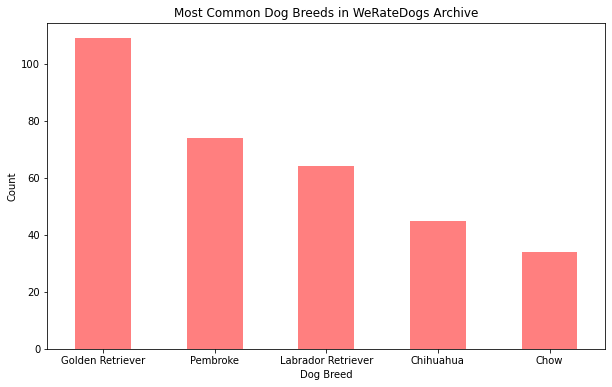

In [62]:
# We get all dog breeds excluding records that have the 'Not a Dog' value
breed_mask = df_master['breed'] != 'Not A Dog'
dogs_with_breed = df_master[breed_mask]

data = dogs_with_breed['breed'].value_counts()[:5]
title = 'Most Common Dog Breeds in WeRateDogs Archive'

plotGraph(data=data, kind='bar', xlabel='Dog Breed', ylabel='Count', title=title, xrot=0, color='r')

The top 5 most common dog breeds are Golden Retriever, Pembroke, Labrador Retrievers, Chihuahua and Chow in order.

`What are the most favorited dog breeds on average ?`


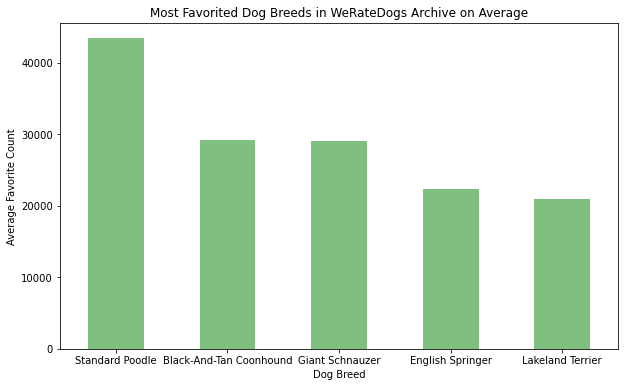

In [63]:
data = dogs_with_breed.groupby('breed')['favorite_count'].mean().sort_values(ascending=False)[:5]
title = 'Most Favorited Dog Breeds in WeRateDogs Archive on Average'

plotGraph(data=data, kind='bar', xlabel='Dog Breed', ylabel='Average Favorite Count', title=title, xrot=0, color='g')

The top 5 favorited dog breeds are Standard Poodle, Black-and-Tan Coonhound, Giant Schnauzer, English Springer and Lakeland Terrier in decreasing order.

`What are the most retweeted dog breeds on average?`


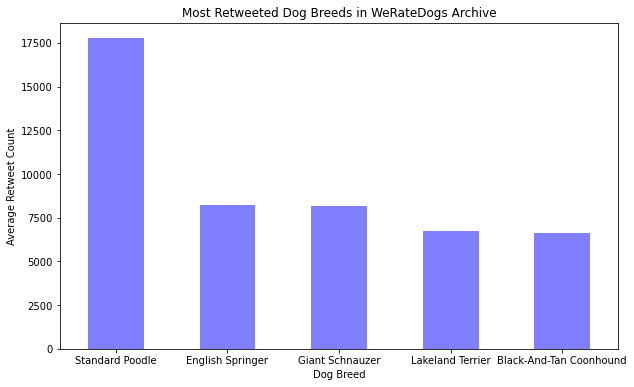

In [64]:
data = dogs_with_breed.groupby('breed')['retweet_count'].mean().sort_values(ascending=False)[:5]
title = 'Most Retweeted Dog Breeds in WeRateDogs Archive'

plotGraph(data=data, kind='bar', xlabel='Dog Breed', ylabel='Average Retweet Count', title=title, xrot=0, color='b')

The top 5 most retweeted dog breeds are Standard Poodle, English Springer, Giant Schnauzer, Lakeland Terrier and Black-And-Tan Coonhound in decreasing order.

`What are the most common dog stages ?`

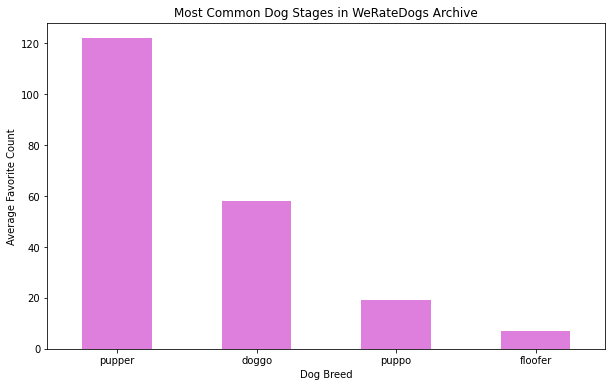

In [65]:
# We get all dogs with a Dog Stage
stage_mask = df_master['dog_stage'] != 'none'
dogs_with_stage = df_master[stage_mask].copy()

# Split records with multiple dog stages
dogs_with_stage['dog_stage'] = dogs_with_stage['dog_stage'].str.split(",")
dogs_with_stage_exploded = dogs_with_stage.explode('dog_stage')

data = dogs_with_stage_exploded['dog_stage'].value_counts()[:5]
title = 'Most Common Dog Stages in WeRateDogs Archive'

plotGraph(data=data, kind='bar', xlabel='Dog Breed', ylabel='Average Favorite Count', title=title, xrot=0, color='m')

Most of the dogs posted via their tweets were in the Pupper stage

`What are the most common dog names ?`

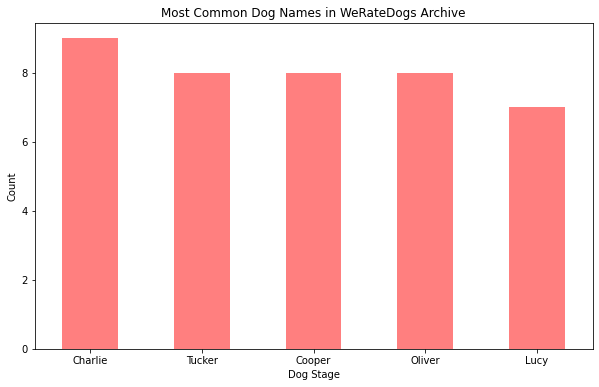

In [66]:
name_mask = df_master['name'] != 'None'
dogs_with_name = df_master[name_mask]

data = dogs_with_name['name'].value_counts()[:5]
title = 'Most Common Dog Names in WeRateDogs Archive'

plotGraph(data=data, kind='bar', xlabel='Dog Stage', ylabel='Count', title=title, xrot=0, color='r')

The most common name in the WeRateDogs Archive is Charlie.

`Do ratings of a dog affect retweeet count of a tweet ?`

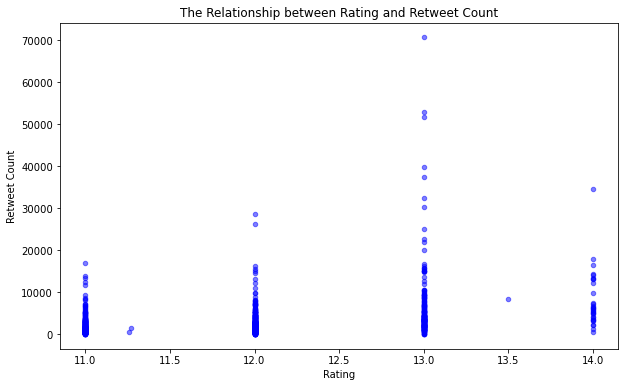

In [67]:
df_master.plot.scatter(x='rating_numerator', y='retweet_count', color='b', alpha=0.5, figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Retweet Count')
plt.title('The Relationship between Rating and Retweet Count');

The ratings of a dog don't affect the amount of retweets a tweet gets

`Do ratings of a dog affect favorite count of a tweet ?`

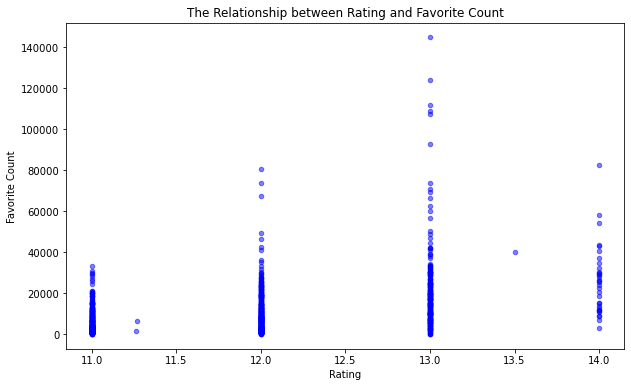

In [68]:
df_master.plot.scatter(x='rating_numerator', y='favorite_count', color='b', alpha=0.5, figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Favorite Count')
plt.title('The Relationship between Rating and Favorite Count');

The ratings of a dog don't affect the amount of favorite a tweet gets

`The most favorited tweet in the archive`

In [76]:
mask = df_master.favorite_count == df_master.favorite_count.max()
df_master[mask][['tweet_id', 'favorite_count']]

,tweet_id,favorite_count
669,744234799360020481,144855


The most favorited tweet received 144,855 favorites

`The most retweeted tweet in the archive`

In [75]:
mask = df_master.retweet_count == df_master.retweet_count.max()
df_master[mask][['tweet_id', 'retweet_count']]

,tweet_id,retweet_count
669,744234799360020481,70714


Well, what a conincidence, it was also the most retweeted tweet with 70,714 retweets